In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib

plt.rc('font', family='NanumBarunGothic')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DACON/물류 유통량 예측 경진대회/train.csv')
test = pd.read_csv('/content/drive/MyDrive/DACON/물류 유통량 예측 경진대회/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/DACON/물류 유통량 예측 경진대회/sample_submission.csv')

## 1. 데이터 전처리
- 결측치, 이상치 처리
- Feature Engineering

In [ ]:
# 데이터 복제
df = data.copy()

### 1) 이상치, 결측치 확인

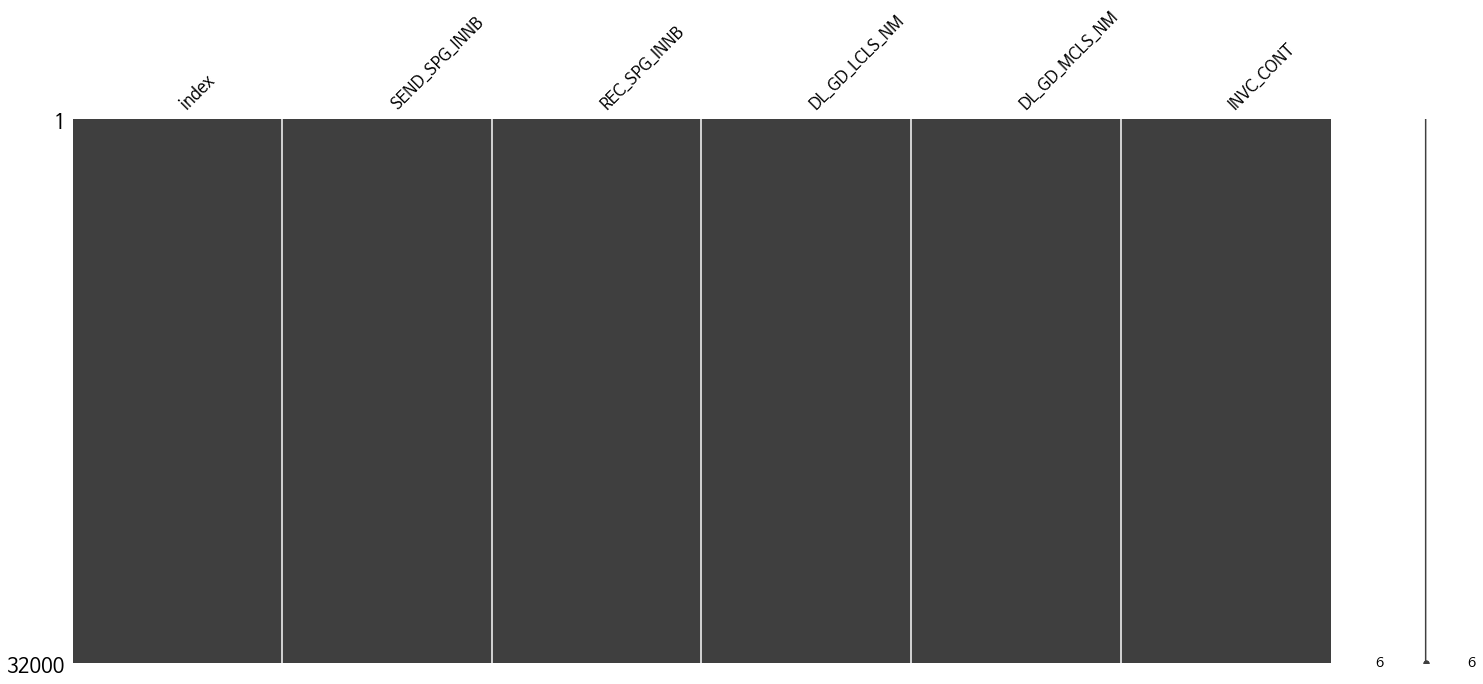

In [ ]:
import missingno as msno

msno.matrix(df, sort='ascending')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          32000 non-null  int64  
 1   SEND_SPG_INNB  32000 non-null  float64
 2   REC_SPG_INNB   32000 non-null  float64
 3   DL_GD_LCLS_NM  32000 non-null  object 
 4   DL_GD_MCLS_NM  32000 non-null  object 
 5   INVC_CONT      32000 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 1.5+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4640 entries, 0 to 4639
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          4640 non-null   int64  
 1   SEND_SPG_INNB  4640 non-null   float64
 2   REC_SPG_INNB   4640 non-null   float64
 3   DL_GD_LCLS_NM  4640 non-null   object 
 4   DL_GD_MCLS_NM  4640 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 181.4+ KB


In [ ]:
df['REC_SIGUNGU'].sort_values()

18308    가평군
25580    가평군
13195    가평군
29002    가평군
1101     가평군
        ... 
4082     횡성군
29791    횡성군
31744    횡성군
26598    횡성군
6204     횡성군
Name: REC_SIGUNGU, Length: 32000, dtype: object

### 2) 외부 데이터 수집
- 법정동 코드

In [ ]:
# 시도 dict
df_raw = pd.read_excel('/content/drive/MyDrive/DACON/물류 유통량 예측 경진대회/법정동코드.xlsx', sheet_name=0)
""
raw_lst = {}
for x, y in zip(df_raw['법정동코드'], df_raw['지역']) :
  raw_lst[x] = y

In [ ]:
# 시군구 dict
df_raw_2 = pd.read_excel('/content/drive/MyDrive/DACON/물류 유통량 예측 경진대회/법정동코드.xlsx',sheet_name=1)

sigungu_lst = {}
for x, y in zip(df_raw_2['법정동코드'], df_raw_2['시군구명']) :
  sigungu_lst[x] = y

In [ ]:
# 파생변수 시도 추가(train set)
df['SEND_SIDO'] = df['SEND_SPG_INNB'].astype('str')
df['REC_SIDO'] = df['REC_SPG_INNB'].astype('str')
df['SEND_SIDO'] = [ df['SEND_SIDO'][x][:2] for x in range(len(df)) ]
df['REC_SIDO'] = [ df['REC_SIDO'][x][:2] for x in range(len(df)) ]

In [ ]:
# 파생변수 시도 추가(test set)
test['SEND_SIDO'] = test['SEND_SPG_INNB'].astype('str')
test['REC_SIDO'] = test['REC_SPG_INNB'].astype('str')
test['SEND_SIDO'] = [ test['SEND_SIDO'][x][:2] for x in range(len(test)) ]
test['REC_SIDO'] = [ test['REC_SIDO'][x][:2] for x in range(len(test)) ]

In [ ]:
# 파생변수 시군구 추가(train set)
df['SEND_SIGUNGU'] = df['SEND_SPG_INNB'].astype('str')
df['REC_SIGUNGU'] = df['REC_SPG_INNB'].astype('str')
df['SEND_SIGUNGU'] = [ df['SEND_SIGUNGU'][x][:10] for x in range(len(df)) ]
df['REC_SIGUNGU'] = [ df['REC_SIGUNGU'][x][:10] for x in range(len(df)) ]

In [ ]:
# # 파생변수 시군구 추가(test set)
test['SEND_SIGUNGU'] = test['SEND_SPG_INNB'].astype('str')
test['REC_SIGUNGU'] = test['REC_SPG_INNB'].astype('str')
test['SEND_SIGUNGU'] = [ test['SEND_SIGUNGU'][x][:10] for x in range(len(test)) ]
test['REC_SIGUNGU'] = [ test['REC_SIGUNGU'][x][:10] for x in range(len(test)) ]

In [ ]:
df.head()

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM,INVC_CONT,SEND_SIDO,REC_SIDO,SEND_SIGUNGU,REC_SIGUNGU
0,0,1.129000e+15,5.011000e+15,패션의류,상의,3,11,50,1129000000,5011000000
1,1,1.135000e+15,5.011000e+15,생활/건강,반려동물,3,11,50,1135000000,5011000000
2,2,1.135000e+15,5.011000e+15,패션의류,기타패션의류,9,11,50,1135000000,5011000000
3,3,1.154500e+15,5.011000e+15,식품,농산물,10,11,50,1154500000,5011000000
4,4,1.165000e+15,5.011000e+15,식품,가공식품,3,11,50,1165000000,5011000000


### 3) Feature Engineering


In [ ]:
# 시도명으로 변환
df['SEND_SIDO'] = df['SEND_SIDO'].apply(lambda x : raw_lst[int(x)])
df['REC_SIDO'] = df['REC_SIDO'].apply(lambda x : raw_lst[int(x)])

In [ ]:
# 시도명으로 변환
test['SEND_SIDO'] = test['SEND_SIDO'].apply(lambda x : raw_lst[int(x)])
test['REC_SIDO'] = test['REC_SIDO'].apply(lambda x : raw_lst[int(x)])

In [ ]:
# 시군구명으로 변환
df['SEND_SIGUNGU'] = df['SEND_SIGUNGU'].apply(lambda x : sigungu_lst[int(x)])
df['REC_SIGUNGU'] = df['REC_SIGUNGU'].apply(lambda x : sigungu_lst[int(x)])

In [ ]:
# 시군구명으로 변환
test['SEND_SIGUNGU'] = test['SEND_SIGUNGU'].apply(lambda x : sigungu_lst[int(x)])
test['REC_SIGUNGU'] = test['REC_SIGUNGU'].apply(lambda x : sigungu_lst[int(x)])

In [ ]:
df.head()

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM,INVC_CONT,SEND_SIDO,REC_SIDO,SEND_SIGUNGU,REC_SIGUNGU
0,0,1.129000e+15,5.011000e+15,패션의류,상의,3,서울특별시,제주특별자치도,성북구,제주시
1,1,1.135000e+15,5.011000e+15,생활/건강,반려동물,3,서울특별시,제주특별자치도,노원구,제주시
2,2,1.135000e+15,5.011000e+15,패션의류,기타패션의류,9,서울특별시,제주특별자치도,노원구,제주시
3,3,1.154500e+15,5.011000e+15,식품,농산물,10,서울특별시,제주특별자치도,금천구,제주시
4,4,1.165000e+15,5.011000e+15,식품,가공식품,3,서울특별시,제주특별자치도,서초구,제주시


#### - 이동 경로 변수 추가

In [ ]:
# 제주도 -> 제주도  => only제주
# 제주도 -> 기타 지역 => 제주to기타
# 기타지역 -> 제주도 => 기타to제주

df['PATH'] = df['SEND_SIDO'].copy()
df.loc[ (df['SEND_SIDO'] != '제주특별자치도') &  (df['REC_SIDO'] == '제주특별자치도') , 'PATH'] = 'etc_to_jeju'
df.loc[ (df['SEND_SIDO'] == '제주특별자치도') &  (df['REC_SIDO'] == '제주특별자치도') ,'PATH'] = 'jeju_to_jeju'
df.loc[ (df['SEND_SIDO'] == '제주특별자치도') &  (df['REC_SIDO'] != '제주특별자치도') ,'PATH'] = 'jeju_to_etc'

In [ ]:
# 제주도 -> 제주도  => only제주
# 제주도 -> 기타 지역 => 제주to기타
# 기타지역 -> 제주도 => 기타to제주

test['PATH'] = test['SEND_SIDO'].copy()
test.loc[ (test['SEND_SIDO'] != '제주특별자치도') &  (test['REC_SIDO'] == '제주특별자치도') , 'PATH'] = 'etc_to_jeju'
test.loc[ (test['SEND_SIDO'] == '제주특별자치도') &  (test['REC_SIDO'] == '제주특별자치도') ,'PATH'] = 'jeju_to_jeju'
test.loc[ (test['SEND_SIDO'] == '제주특별자치도') &  (test['REC_SIDO'] != '제주특별자치도') ,'PATH'] = 'jeju_to_etc'

In [ ]:
df.head()

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM,INVC_CONT,SEND_SIDO,REC_SIDO,SEND_SIGUNGU,REC_SIGUNGU,PATH
0,0,1.129000e+15,5.011000e+15,패션의류,상의,3,서울특별시,제주특별자치도,성북구,제주시,etc_to_jeju
1,1,1.135000e+15,5.011000e+15,생활/건강,반려동물,3,서울특별시,제주특별자치도,노원구,제주시,etc_to_jeju
2,2,1.135000e+15,5.011000e+15,패션의류,기타패션의류,9,서울특별시,제주특별자치도,노원구,제주시,etc_to_jeju
3,3,1.154500e+15,5.011000e+15,식품,농산물,10,서울특별시,제주특별자치도,금천구,제주시,etc_to_jeju
4,4,1.165000e+15,5.011000e+15,식품,가공식품,3,서울특별시,제주특별자치도,서초구,제주시,etc_to_jeju


#### - 네이버 트렌드 점수 (2020년 1월 기준)

In [ ]:
trend_score = pd.read_excel('/content/drive/MyDrive/DACON/물류 유통량 예측 경진대회/네이버_데이터랩_트렌드점수_202001.xlsx')
trend_score_dict = {}
for x, y in zip(trend_score['카테고리'], trend_score['트렌드점수']) :
  trend_score_dict[x] = y
trend_score_dict

{'디지털/가전': 100, '생활/건강': 100, '식품': 52, '여행/문화': 9, '패션의류': 82, '화장품/미용': 27}

In [ ]:
df['TREND_SCORE'] = df['DL_GD_LCLS_NM'].apply(lambda x : trend_score_dict[x])

In [ ]:
test['TREND_SCORE'] = test['DL_GD_LCLS_NM'].apply(lambda x : trend_score_dict[x])

In [ ]:
df.head()

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM,INVC_CONT,SEND_SIDO,REC_SIDO,SEND_SIGUNGU,REC_SIGUNGU,PATH,TREND_SCORE
0,0,1.129000e+15,5.011000e+15,패션의류,상의,3,서울특별시,제주특별자치도,성북구,제주시,etc_to_jeju,82
1,1,1.135000e+15,5.011000e+15,생활/건강,반려동물,3,서울특별시,제주특별자치도,노원구,제주시,etc_to_jeju,100
2,2,1.135000e+15,5.011000e+15,패션의류,기타패션의류,9,서울특별시,제주특별자치도,노원구,제주시,etc_to_jeju,82
3,3,1.154500e+15,5.011000e+15,식품,농산물,10,서울특별시,제주특별자치도,금천구,제주시,etc_to_jeju,52
4,4,1.165000e+15,5.011000e+15,식품,가공식품,3,서울특별시,제주특별자치도,서초구,제주시,etc_to_jeju,52


#### - 이상치 확인

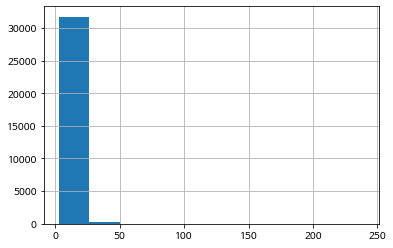

In [ ]:
y_train = df['INVC_CONT']
y_train.hist()

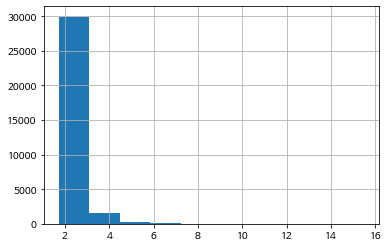

In [ ]:
# y값 스케일링
y_train_trans = np.sqrt(y_train)
y_train_trans.hist()

In [ ]:
# 이상치 확인
# Q1 = df['INVC_CONT'].quantile(0.25)
# Q3 = df['INVC_CONT'].quantile(0.75)
# IQR = Q3-Q1

# OUTLIER = (df['INVC_CONT'] <= (Q1 - 1.5*IQR)) | (df['INVC_CONT'] >= (Q1 + 1.5*IQR))
# df_outlier = df[OUTLIER]
# df_outlier.to_csv('/content/drive/MyDrive/DACON/물류 유통량 예측 경진대회/df_outlier.csv')

In [ ]:
# plt.figure(figsize=(10,5))
# sns.distplot(df.INVC_CONT, kde=False)

# # 이상치 영역 박스 그리기

# plt.axvspan(xmin=Q1, xmax=df.INVC_CONT.min(), alpha=0.2, color='red')
# plt.axvspan(xmin=Q3, xmax=df.INVC_CONT.max(), alpha=0.2, color='red')

## 2. EDA(데이터 탐색)

In [ ]:
df_path_mean = df.groupby('PATH')['INVC_CONT'].mean()
df_path_mean

PATH
etc_to_jeju     5.803185
jeju_to_etc     4.485755
jeju_to_jeju    5.949153
Name: INVC_CONT, dtype: float64

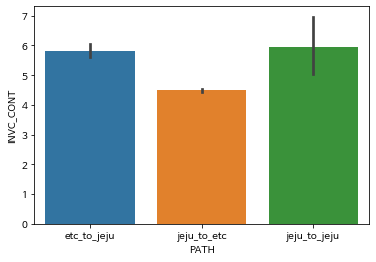

In [ ]:
fig, ax = plt.subplots(1,1)
sns.barplot(data=df, x='PATH', y='INVC_CONT')
plt.show()

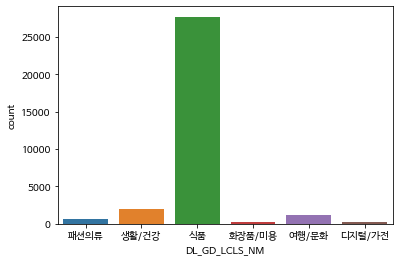

In [ ]:
fig, ax = plt.subplots(1,1)
sns.countplot(data=df, x='DL_GD_LCLS_NM')
plt.show()

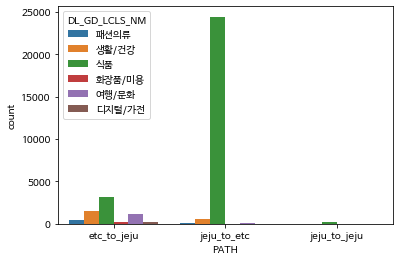

In [ ]:
fig, ax = plt.subplots(1,1)
sns.countplot(data=df, x='PATH', hue='DL_GD_LCLS_NM')
plt.show()

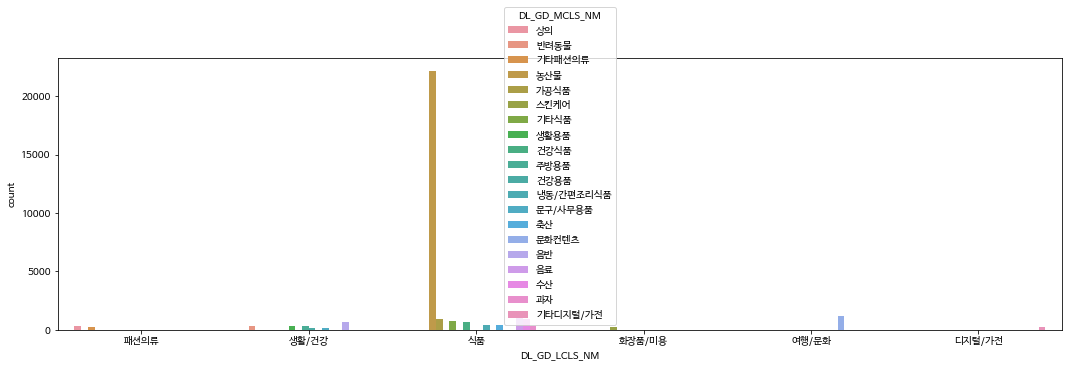

In [ ]:
plt.figure(figsize=(18,5))
sns.countplot(data=df, x='DL_GD_LCLS_NM', hue='DL_GD_MCLS_NM')
plt.show()

## 3. 모델링


### 1) 라벨 인코딩

In [ ]:
df.columns

Index(['index', 'SEND_SPG_INNB', 'REC_SPG_INNB', 'DL_GD_LCLS_NM',
       'DL_GD_MCLS_NM', 'INVC_CONT', 'SEND_SIDO', 'REC_SIDO', 'SEND_SIGUNGU',
       'REC_SIGUNGU', 'PATH', 'TREND_SCORE'],
      dtype='object')

In [ ]:
total_data = pd.concat([df, test])
total_data = pd.get_dummies(total_data)

train_data = total_data[~total_data['INVC_CONT'].isnull()]

test_data = total_data[total_data['INVC_CONT'].isnull()]

test_data = test_data.drop('INVC_CONT', axis=1)

In [ ]:
x_train = train_data.iloc[:, 4:]
x_test = test_data.iloc[:, 3:]

In [ ]:
x_train.shape, x_test.shape

((32000, 507), (4640, 507))

### 2) 스케일링

In [ ]:
# y값만 스케일링
y_train = np.log1p(df['INVC_CONT'])

### 3) Cross Validation

In [ ]:
!pip install ngboost

In [ ]:
!pip install catboost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from ngboost import NGBRegressor

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits =  10, shuffle = True, random_state = 42)


### 4) 모델링 테스트

#### - GradientBoostingRegressor

In [ ]:
gbm = GradientBoostingRegressor(random_state = 42)

rmse_list = []

gb_pred = np.zeros((x_test.shape[0]))
for tr_idx, val_idx in kf.split(x_train, y_train) :
    x_tr, y_yr = x_train.iloc[tr_idx], y_train.iloc[tr_idx]
    x_val, y_val = x_train.iloc[val_idx], y_train.iloc[val_idx]
    
    gbm.fit(x_tr, y_yr)
    
    pred = np.expm1([0 if x < 0 else x for x in gbm.predict(x_val)])
    sub_pred = np.expm1([0 if x < 0 else x for x in gbm.predict(x_test)])
    rmse = np.sqrt(mean_squared_error(y_val, pred))
    
    rmse_list.append(rmse)
    
    gb_pred += (sub_pred / 10)

In [ ]:
np.mean(rmse_list)

2.670313630489657

#### - NGBRegressor

In [ ]:
# ngb = NGBRegressor(random_state = 42)

# rmse_list = []
# ngb_pred = np.zeros((x_test.shape[0]))
# for tr_idx, val_idx in kf.split(x_train, y_train) :
#     x_tr, y_yr = x_train.iloc[tr_idx], y_train.iloc[tr_idx]
#     x_val, y_val = x_train.iloc[val_idx], y_train.iloc[val_idx]
    
#     ngb.fit(x_tr, y_yr)
    
#     pred = np.expm1([0 if x < 0 else x for x in ngb.predict(x_val)])
#     sub_pred = np.expm1([0 if x < 0 else x for x in ngb.predict(x_test)])
#     rmse = np.sqrt(mean_squared_error(y_val, pred))
    
#     rmse_list.append(rmse)
    
#     ngb_pred += (sub_pred / 10)

In [ ]:
# np.mean(rmse_list)

#### - LGBMRegressor

In [ ]:
lgbm  = LGBMRegressor(random_state = 42)

rmse_list = []
lgb_pred = np.zeros((x_test.shape[0]))
for tr_idx, val_idx in kf.split(x_train, y_train) :
    x_tr, y_yr = x_train.iloc[tr_idx], y_train.iloc[tr_idx]
    x_val, y_val = x_train.iloc[val_idx], y_train.iloc[val_idx]
    
    lgbm.fit(x_tr, y_yr)
    
    pred = np.expm1([0 if x < 0 else x for x in lgbm.predict(x_val)])
    sub_pred = np.expm1([0 if x < 0 else x for x in lgbm.predict(x_test)])
    rmse = np.sqrt(mean_squared_error(y_val, pred))
    
    rmse_list.append(rmse)
    
    lgb_pred += (sub_pred / 10)

In [ ]:
np.mean(rmse_list)

2.576388940900277

#### - XGBRegressor

In [ ]:
xgb = XGBRegressor(random_state = 42)

rmse_list = []
xgb_pred = np.zeros((x_test.shape[0]))
for tr_idx, val_idx in kf.split(x_train, y_train) :
    x_tr, y_yr = x_train.iloc[tr_idx], y_train.iloc[tr_idx]
    x_val, y_val = x_train.iloc[val_idx], y_train.iloc[val_idx]
    
    xgb.fit(x_tr, y_yr)
    
    pred = np.expm1([0 if x < 0 else x for x in xgb.predict(x_val)])
    #pred = np.nan_to_num(pred)
    sub_pred = np.expm1([0 if x < 0 else x for x in xgb.predict(x_test)])
    rmse = np.sqrt(mean_squared_error(y_val, pred))
    
    rmse_list.append(rmse)
    
    xgb_pred += (sub_pred / 10)

[01:24:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:24:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:25:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:25:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:26:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:26:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:27:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:27:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
np.mean(rmse_list)

2.664673035497061

#### - CatBoostRegressor

In [ ]:
cat = CatBoostRegressor(random_state = 42, silent = True)

rmse_list = []
cat_pred = np.zeros((x_test.shape[0]))
for tr_idx, val_idx in kf.split(x_train, y_train) :
    x_tr, y_yr = x_train.iloc[tr_idx], y_train.iloc[tr_idx]
    x_val, y_val = x_train.iloc[val_idx], y_train.iloc[val_idx]
    
    cat.fit(x_tr, y_yr)
    
    pred = np.expm1([0 if x < 0 else x for x in cat.predict(x_val)])
    sub_pred = np.expm1([0 if x < 0 else x for x in cat.predict(x_test)])
    rmse = np.sqrt(mean_squared_error(y_val, pred))
    
    rmse_list.append(rmse)
    
    cat_pred += (sub_pred / 10)

In [ ]:
np.mean(rmse_list)

2.8622778811823784

#### - AdaBoostRegressor

In [ ]:
ada = AdaBoostRegressor(random_state = 42)

rmse_list = []
ada_pred = np.zeros((x_test.shape[0]))
for tr_idx, val_idx in kf.split(x_train, y_train) :
    x_tr, y_yr = x_train.iloc[tr_idx], y_train.iloc[tr_idx]
    x_val, y_val = x_train.iloc[val_idx], y_train.iloc[val_idx]
    
    ada.fit(x_tr, y_yr)
    
    pred = np.expm1([0 if x < 0 else x for x in ada.predict(x_val)])
    sub_pred = np.expm1([0 if x < 0 else x for x in ada.predict(x_test)])
    rmse = np.sqrt(mean_squared_error(y_val, pred))
    
    rmse_list.append(rmse)
    
    ada_pred += (sub_pred / 10)

In [ ]:
np.mean(rmse_list)

5.716080770547133

#### - RandomForestRegressor




In [ ]:
rf = RandomForestRegressor(random_state = 42)

rmse_list = []
rf_pred = np.zeros((x_test.shape[0]))
for tr_idx, val_idx in kf.split(x_train, y_train) :
    x_tr, y_yr = x_train.iloc[tr_idx], y_train.iloc[tr_idx]
    x_val, y_val = x_train.iloc[val_idx], y_train.iloc[val_idx]
    
    rf.fit(x_tr, y_yr)
    
    pred = np.expm1([0 if x < 0 else x for x in rf.predict(x_val)])
    sub_pred = np.expm1([0 if x < 0 else x for x in rf.predict(x_test)])
    rmse = np.sqrt(mean_squared_error(y_val, pred))
    
    rmse_list.append(rmse)
    
    rf_pred += (sub_pred / 10)

In [ ]:
np.mean(rmse_list)

3.1794362777630476

#### - 결과값 voting

In [ ]:
# submission['INVC_CONT'] = (gb_pred + lgb_pred + xgb_pred + cat_pred) / 4
submission['INVC_CONT'] = lgb_pred

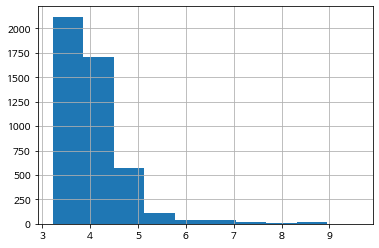

In [ ]:
submission['INVC_CONT'].hist()

In [ ]:
submission.to_csv('/content/drive/MyDrive/DACON/물류 유통량 예측 경진대회/lgb_model_result_211213.csv', index=False)